In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3b import *

In [2]:
# %matplotlib widget

In [3]:
test = force_vs_time(10,15,200,3,10,"x", offset_y=0, yuk_or_grav="yuk",alpha=1e8, bead_size=7.6e-6)
# test2 = force_vs_time(0.1e-6,0e-6,200e-6,3,"z",100e-6, yuk_or_grav="yuk",alpha=1,bead_size=3.8e-6)


Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


In [4]:
test2 = force_vs_position(10,15,10,"x",yuk_or_grav="yuk",bead_size=7.6,posvec=np.linspace(-249.5, 249.0, 501))


Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


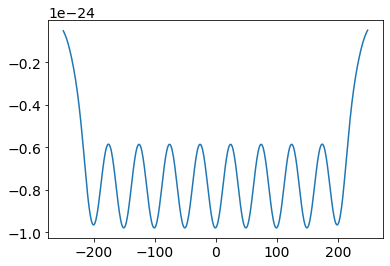

In [5]:
plt.plot(test2[0],test2[1])
plt.show()

In [ ]:
def fft_norm(N, fsamp):
    "Factor to normalize FFT to ASD units"
    return np.sqrt(2 / (N * fsamp))
scale = np.sqrt(2)*fft_norm(5000, 5000)

_,ax = plt.subplots()
x = test[1]
# x2 = test2[1]
fft = np.abs(np.fft.rfft(x))*scale*1.85/1.55
angles = np.angle(np.fft.rfft(x))
# fft2 = np.abs(np.fft.rfft(x2))*scale
freq = np.fft.rfftfreq(len(x), d=1./5000)
ax.semilogy(freq, fft, label='7.6 $\mu m$ sphere - Z force')
# ax.semilogy(freq, fft2, label='7.6 $\mu m$ sphere - Z force', alpha=0.5)
ax.set(xlim=(1,100), ylim=(None,None), xlabel='frequency [Hz]', ylabel='Force [N]', title=r'$\alpha=1x10^{8}$')
ax.legend()
print('Z force [N] at 36Hz.:', fft[freq==36])
print('sensitivity [alpha]:', 1e-17/fft[freq==36]*1e8)

In [ ]:
angles[freq==2]

In [ ]:
_,ax = plt.subplots()
ax.plot(test[0], test[1])
ax.set(xlabel='time [sec.]', ylabel='Z-Force [N]')
print(np.mean(test[1]))

In [ ]:
#SI units
G = 6.67e-11
Ms = 100e-12*1e-3 #100pg
Ma = 5e-6*5e-6*2e-6*19300 #attractor model
R = 5e-6
print(G*Ms*Ma/R/R)

In [ ]:
# test2 = force_vs_position(9,6,10,"z",yuk_or_grav="grav")
test3 = force_vs_position(9,6,10000,"z",yuk_or_grav="yuk")

In [ ]:
# plt.plot(test2[0],test2[1])
plt.plot(test3[0],test3[1])

print(np.min(test3[1]))

In [ ]:
_,ax = plt.subplots()
ax.plot(test[0],test[1]-np.mean(test[1]))
# ax.plot(test2[0],test2[1]-np.mean(test2[1]))
# plt.xlim(0,1/13.*2)

In [ ]:
test_small = force_vs_time(8e-6,5e-6,100e-6,3,"z",lambda_par=10e-6,yuk_or_grav="yuk",alpha=1e8,bead_size=2.4e-6)
test_big = force_vs_time(8e-6,5e-6,100e-6,3,"z",lambda_par=10e-6,yuk_or_grav="yuk",alpha=1e8,bead_size=3.8e-6)

In [ ]:
_,ax = plt.subplots()
x = test_small[1]-np.mean(test_small[1])
fft = np.abs(np.fft.rfft(x, norm='ortho'))
freq = np.fft.rfftfreq(len(x), d=1./5000)
ax.semilogy(freq, fft)

x2 = test_big[1]-np.mean(test_big[1])
fft2 = np.abs(np.fft.rfft(x2, norm='ortho'))
freq2 = np.fft.rfftfreq(len(x2), d=1./5000)
ax.semilogy(freq2, fft2, alpha=0.4)

ax.set(xlim=(1,100), xlabel='frequency [Hz]', ylabel='Z-force [N]', title=r'$\alpha=10^8$')

print(fft2[freq2==18]/fft[freq==18])